In [1]:
import akshare as ak

### 股票
##### 使用akshare 获取上证指数历史行情
stock_zh_index_daily_df = ak.stock_zh_index_daily_em(symbol="sh000001", start_date="20220101", end_date="20230101")
print(stock_zh_index_daily_df[:3])

         date     open    close     high      low     volume        amount
0  2022-01-04  3649.15  3632.33  3651.89  3610.09  405027768  5.102511e+11
1  2022-01-05  3628.26  3595.18  3628.26  3583.47  423902029  5.389636e+11
2  2022-01-06  3581.22  3586.08  3594.49  3559.88  371540544  4.742843e+11


In [13]:
# 导入talib进行计算
import talib as ta

<Axes: >

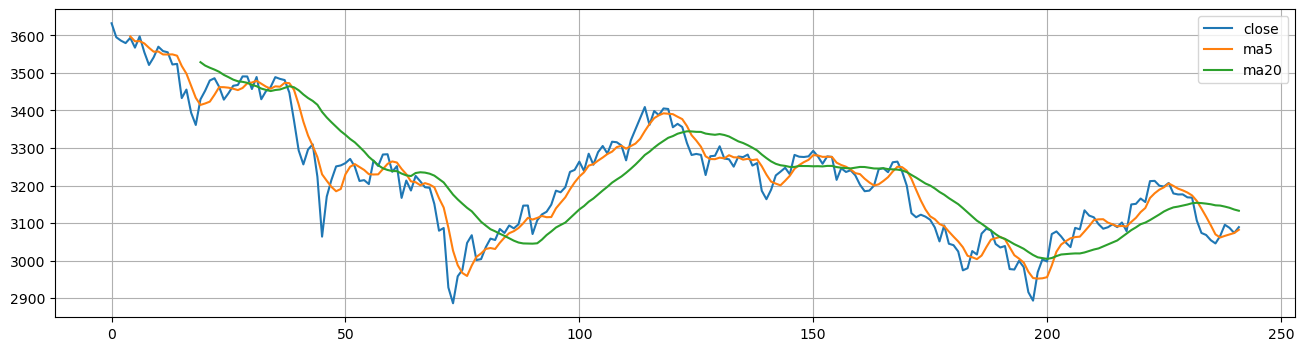

In [22]:
# 计算均线
# 拷贝一份数据出来
data_copy = stock_zh_index_daily_df[['close','date']].copy()
data_copy['ma5']=ta.SMA(data_copy['close'].values, timeperiod=5)
data_copy['ma10']=ta.SMA(data_copy['close'].values, timeperiod=10)
data_copy['ma20']=ta.SMA(data_copy['close'].values, timeperiod=20)
data_copy['ma30']=ta.SMA(data_copy['close'].values, timeperiod=30)
# 对收盘价和布林通道进行展示
data_copy[['close','ma5','ma20']].plot(figsize=(16,4),grid = True)

<Axes: >

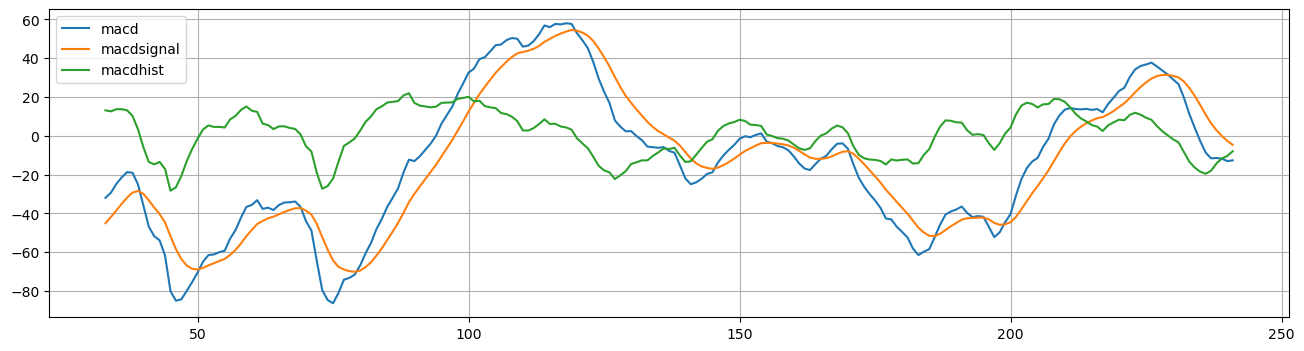

In [28]:
# 计算macd
# 拷贝一份数据出来
data_copy = stock_zh_index_daily_df[['close','date']].copy()
data_copy['macd'], data_copy['macdsignal'], data_copy['macdhist'] = ta.MACD(data_copy['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
# 对收盘价和布林通道进行展示
data_copy[['macd','macdsignal','macdhist']].plot(figsize=(16,4),grid = True)

<Axes: >

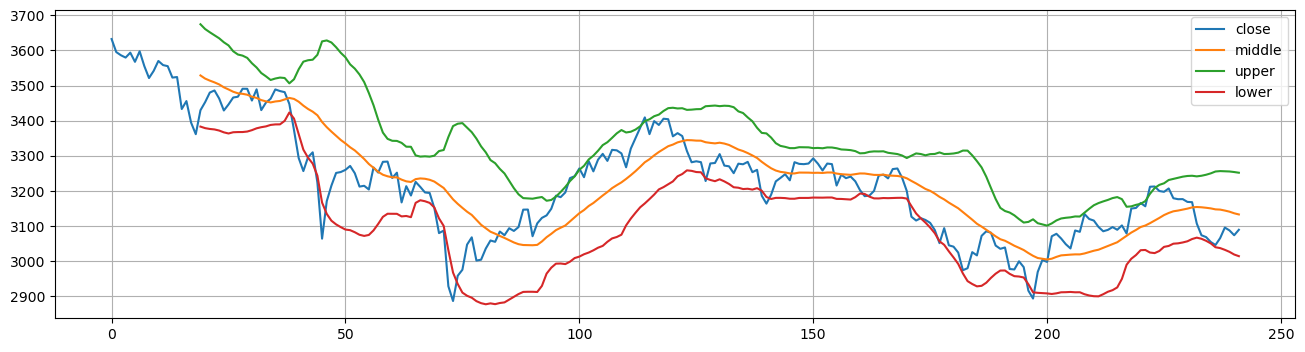

In [23]:
# 计算布林通道
# 拷贝一份数据出来
data_copy1 = stock_zh_index_daily_df[['close','date']].copy()
# 直接调用包计算布林通道
data_copy1['upper'],data_copy1['middle'],data_copy1['lower'] = ta.BBANDS(
                                stock_zh_index_daily_df['close'].values,
                                timeperiod=20,
                                nbdevup = 2,
                                nbdevdn = 2,
                                matype = 0
                               )
# 对收盘价和布林通道进行展示
data_copy1[['close','middle','upper', 'lower']].plot(figsize=(16,4),grid = True)


用talib 计算指标非常方便，这还远不是它功能的全部，包括动量、形态等指标都支持，在后续用到的时候再进行补充。